## ML_Zoompcamp_Evaluation_Metrics

In [68]:
# import necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
# get the dataset
car_pricing = None
try:
    csv_url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
    car_pricing = pd.read_csv(csv_url)
    car_pricing = car_pricing
except IOError as e:
    print(e)


In [70]:
car_pricing.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data Preparation

In [71]:
car_pricing.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [72]:
cols = ['Make', 'Model', 'Year',  'Engine HP',
        'Engine Cylinders', 'Transmission Type',
        'Vehicle Style', 'highway MPG', 'city mpg', 
        'MSRP'
        ]

data = car_pricing[cols]

In [73]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [74]:
data.head(3)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350


In [75]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [76]:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [77]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [78]:
data = data.fillna(0)

In [79]:
# rename the msrp column
data.rename(columns={"msrp": "price"}, inplace=True)

In [80]:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [81]:
categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

In [82]:
for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(' ', '_')

In [83]:
data[categorical_columns].head(2)

,make,model,transmission_type,vehicle_style
0,bmw,1_series_m,manual,coupe
1,bmw,1_series,manual,convertible


In [84]:
# numerical_columns = list(data.dtypes[data.dtypes != 'object'].index)
numerical_columns = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [85]:
# Make price binary
price_avg = data['price'].mean()
data['above_average'] = data['price'] > price_avg
data['above_average'] = data['above_average'].astype(int)

In [86]:
data.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1


In [87]:
#import library
#split the data
from sklearn.model_selection import train_test_split

data_full_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=1)

In [88]:
len(data_train), len(data_val), len(data_test)

(7148, 2383, 2383)

In [89]:
y_train = data_train.above_average.values
y_val = data_val.above_average.values
y_test = data_test.above_average.values

del data_train['above_average']
del data_val['above_average']
del data_test['above_average']

### Question 1

In [90]:
numerical_columns

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [91]:
from sklearn.metrics import roc_auc_score

In [92]:
num_cols = numerical_columns[1:] #selecting needed columns

for cols in num_cols:
    rauc = roc_auc_score(y_train, data_train[cols])
    if rauc < 0.5: #if variable is negatively correlated
        rauc = roc_auc_score(y_train, -data_train[cols])
    print(f'{cols}, {rauc:.3}')

engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
city_mpg, 0.673


##### Ans: 'engine_hp' has the highest AUC

### Question 2

In [93]:
# on-hot encoding with DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# train logistic regression with Scikit-Learn
from sklearn.linear_model import LogisticRegression

In [94]:
dv = DictVectorizer(sparse=False)

train_dict = data_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [95]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [96]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.60078195, 0.02068662, 0.48795947, ..., 0.00663676, 0.99998207,
       0.09048892])

In [97]:
round(roc_auc_score(y_val,y_pred), 3)

0.976

##### Ans: 0.976

### Question 3

In [98]:
def pr_rc(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        #true positive and true negative
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        #false positive and false negative
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores['pr'] = df_scores.tp / (df_scores.tp + df_scores.fp) # precision
    df_scores['rc'] = df_scores.tp / (df_scores.tp + df_scores.fn) # recall
    
    return df_scores

In [99]:
df_scores = pr_rc(y_val, y_pred)

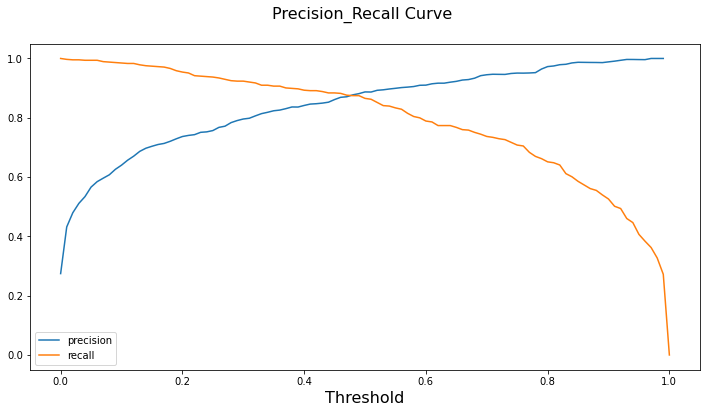

In [100]:
plt.figure(figsize=(12,6))
plt.plot(df_scores.threshold, df_scores.pr, label='precision')
plt.plot(df_scores.threshold, df_scores.rc, label='recall')
plt.legend()
plt.title('Precision_Recall Curve \n', size='16')
plt.xlabel('Threshold', size='16')
plt.show()

##### Ans: 0.48

### Question 4

In [101]:
df_scores['f1'] = 2 * (((df_scores.pr) * (df_scores.rc)) / ((df_scores.pr) + (df_scores.rc)))

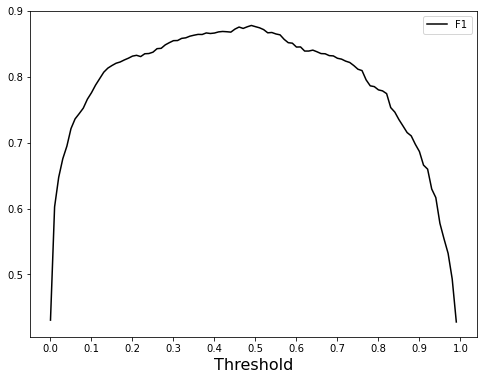

In [102]:
plt.figure(figsize=(8,6))
plt.plot(df_scores.threshold, df_scores.f1, label='F1', color="black")
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel('Threshold', size='16')
plt.legend()
plt.show()

In [103]:
df_scores[df_scores['f1'] == df_scores['f1'].max()]

,threshold,tp,fp,fn,tn,pr,rc,f1
49,0.49,572,77,82,1652,0.881356,0.874618,0.877974


##### Ans: threshold of 0.52

### Question 5

In [104]:
from sklearn.model_selection import KFold

In [122]:
def train(data_train, y_train, C=1.0):
    dicts = data_train[categorical_columns + numerical_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [123]:
dv, model = train(data_train, y_train)

In [124]:
dv, model

(DictVectorizer(sparse=False),
 LogisticRegression(max_iter=1000, solver='liblinear'))

In [125]:
def predict(data, dv, model):
    dicts = data[categorical_columns + numerical_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [126]:
y_pred = predict(data_val, dv, model)

In [127]:
y_pred

array([0.95773214, 0.28263999, 0.01494081, ..., 0.00350886, 0.01923737,
       0.93527577])

In [128]:
from tqdm.auto import tqdm

In [129]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(data_full_train):
    data_train = data_full_train.iloc[train_idx]
    data_val = data_full_train.iloc[val_idx]

    y_train = data_train.above_average.values
    y_val = data_val.above_average.values

    dv, model = train(data_train, y_train)
    y_pred = predict(data_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.980 +- 0.003


##### Ans: 0.003

### Question 6

In [130]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(data_full_train):
        data_train = data_full_train.iloc[train_idx]
        data_val = data_full_train.iloc[val_idx]

        y_train = data_train.above_average.values
        y_val = data_val.above_average.values

        dv, model = train(data_train, y_train, C=C)
        y_pred = predict(data_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01 0.952 +- 0.002
C=0.1 0.972 +- 0.002
C=0.5 0.977 +- 0.001
C=10 0.984 +- 0.004

